## Visual EDA on the 2015 American Housing Survey

In this notebook, the 2015 American Housing Survey is examined and several visualizations are created to understand how people rate their homes and neighborhoods, and what factors affect the way people rate their homes and neighborhoods.

In [1]:
# import packages that will be used for plotting and analyzing the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# read in 'df_household_clean.csv' which has been wrangled and cleaned already

df_household_clean = pd.read_csv('df_household_clean.csv')


C:\Users\wongk3.NA\AppData\Local\Continuum\Anaconda2\envs\newPy36\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# examine the first 5 entries of the DataFrame

pd.set_option('display.max_columns', None)
df_household_clean.head()


,CONTROL,total_rooms,housing_cost,move_change,move_commute,move_costs,move_family,move_better_home,move_nh,move_job,move_other,move_form_hh,search_family,search_listing,search_net,search_other,search_newspaper,search_realtor,search_sign,monthly_rent,garage,num_dining,num_laundry,gut_rehab,is_condo,stairs_broken,stairs,musty,rating_house,rating_neighborhood,petty_crime,near_transit,risk_of_flood,good_schools,serious_crime,subdivision,tenure,porch,out_water_leaks,in_water_leaks,toilet_broke,paint_peeling,months_permanent,suitable_yrround,timeshare,rent_control,rent_subsidy,near_abandoned,near_bar_windows,near_trash,interview_lang,metro_area,interview_mode,interview_status,interview_month,bldg_type,entry_sys,hh_sex,hh_age,year_moved_in,partner_household,household_type,num_elders,num_adults,num_nonrelative,hh_young_kids,hh_old_kids,num_young_kids,num_old_kids,num_sub_family,num_second_family,num_people,multigeneration,year_built,hoa,foundation_type,stories,unit_floors,unit_size,num_bedrooms,num_kitchens,bath_exclusive,kitchen_exclusive,fridge,has_kitchen_sink,dishwash,washer,cook_type,cook_fuel,dryer,hot_water_type,fireplace,too_cold,no_running_water,wall_crack,floor_hole,foundation_crumb,missing_shingle,roof_hole,roof_sag,missing_siding,wall_slope,windows_boarded,windows_broken,windows_barred,rodent,roach,sewerbreakdowns,fuse_blow,elec_bill,gas_amount,oil_amount,other_amount,trash_amount,water_amount,utilities_amount,search_stop,home_better_than_last,nh_better_than_last,manager_onsite,adequacy,hud_subsidized,number_upkeep_probs,num_bathrooms,heat_fuel,heat_type,household_income,family_income,remodeling_costs
0,11000001,7,1250 to 1499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,1,0,No,No,NaN,No,Never,10.0,10.0,Disagree,Disagree,Disagree,Agree,Disagree,Yes,Owned or being bought by someone in your house...,Yes,No,No,No,No,NaN,NaN,NaN,NaN,NaN,There are no vandalized buildings,No buildings with bars,No trash,English,Philadelphia,Telephone interview,Occupied interview,June,"One-family house, detached",NaN,Male,49.0,2000.0,No unmarried partner in household,Married-couple family household,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,Householder and one younger generation,2000,Yes,Basement under all of the house,2,2.0,"2,000 to 2,499 square feet",3,1,NaN,NaN,Yes,Yes,Yes,Yes,"Cooking stove or range with oven, in working o...",Electric,Working electric power clothes dryer,Has running hot water with electric water heater,"Has usable fireplace, not considered heating e...",No,No,No,No,No,No,No,No,No,No,No,No,No,No signs in the last 12 months,No signs in the last 12 months,No breakdowns in the last 3 months,No fuses / breakers blown in the last 3 months,140.0,60.0,0.0,0.0,20.0,60.0,280.0,NaN,NaN,NaN,NaN,Adequate,NaN,Less than 3 upkeep problems,2.5 bathrooms,Piped gas,Forced warm-air furnace,113000.0,113000.0,NaN
1,11000002,7,1500 to 1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0,0,NaN,No,No,Yes,Never,10.0,10.0,Disagree,Agree,Disagree,Agree,Disagree,No,Owned or being bought by someone in your house...,Yes,No,No,No,No,NaN,NaN,NaN,NaN,NaN,There are no vandalized buildings,No buildings with bars,No trash,English,Other Metropolitan,Telephone interview,Occupied interview,May,"One-family house, detached",NaN,Female,77.0,2005.0,No unmarried partner in household,"Female householder, not living alone",2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Householder only,2000,No,Concrete slab,2,2.0,"3,000 to 3,999 square feet",3,1,NaN,NaN,Yes,Yes,Yes,Yes,"Cooking stove or range with oven, in working o...",Electric,Working electric power clothes dryer,Has running hot water with piped gas water heater,No usable fireplace,No,No,No,No,No,No,No,No,No,No,No,No,No,No signs in the last 12 months,No signs in the last 12 months,No breakdowns in the last 3 months,No fuses / breakers blown in the last 3 months,70.0,110.0,0.0,0.0,0.0,10.0,190.0,NaN,NaN,NaN,NaN,Adequate,NaN,Less than 3 upkeep problems,2.5 bathrooms,Piped gas,S

## What is the distribution of ratings for homes in the 2015 American Housing Survey? 

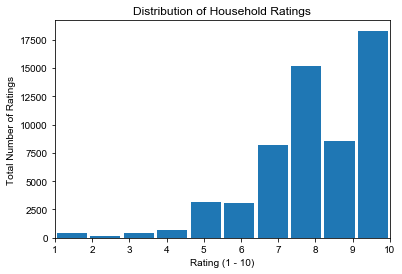

In [4]:
# plot a histogram to show the distribution of ratings

plt.hist(x='rating_house', bins=10, data=df_household_clean, rwidth=.9)
plt.xlim([1,10])
plt.title('Distribution of Household Ratings')
plt.xlabel('Rating (1 - 10)')
plt.ylabel('Total Number of Ratings')

sns.set()
plt.show()

The most common rating that respondents gave their homes was 10, followed by 8. Very few people gave their homes a rating lower than 5.

## How do house ratings vary amongst different metropolitan areas?

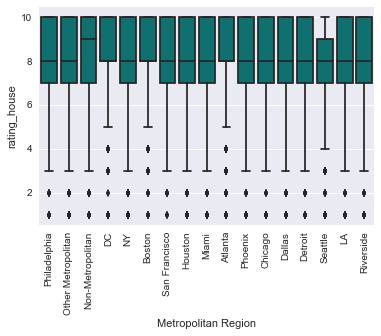

In [5]:
sns.boxplot(y='rating_house', x='metro_area', data=df_household_clean, color='teal')
plt.xticks(rotation=90)
plt.xlabel('Metropolitan Region')
plt.show()

The median rating for almost every region is 8, but the range of ratings varies slightly by region. The range of ratings for DC, Boston, and Atlanta were smallest, with 95% of ratings falling between 5 and 10. Seattle's distribution of ratings is also slightly different. It may be worth examining the differences between ratings in metropolitan regions more closely.

## How do house ratings vary between renters and homeowners?

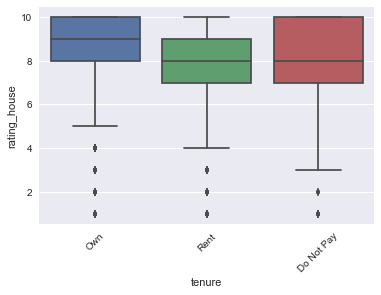

In [6]:
sns.boxplot(x='tenure', y='rating_house', data=df_household_clean).set(xticklabels=['Own','Rent','Do Not Pay'])
plt.xticks(rotation=45)
plt.show()

Homeowners tend to rate their homes more highly than renters and people who do not pay for their own housing.

## Do renters and homeowners rate their homes differently in different metropolitan regions?

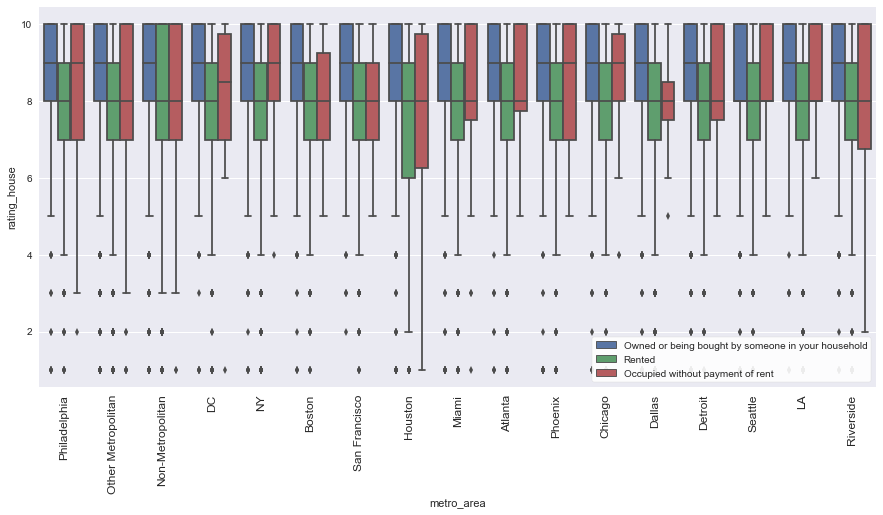

In [22]:
plt.figure(figsize=(15,7))

sns.boxplot(x='metro_area', y='rating_house', data=df_household_clean, hue='tenure')

plt.xticks(rotation=90, fontsize=12)
plt.legend(loc='lower right', frameon=True, facecolor='white', framealpha=0.9)
plt.show()

## Does the number of rooms in a home correlate to how highly the home is rated?

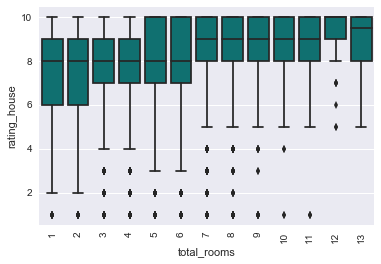

In [8]:
sns.boxplot(x='total_rooms', y='rating_house', data=df_household_clean, color='teal')
plt.xticks(rotation=90)
plt.show()

In general, the more rooms there were in a home, the higher the rating.

## Does the number of rooms per person affect how highly a home is rated?

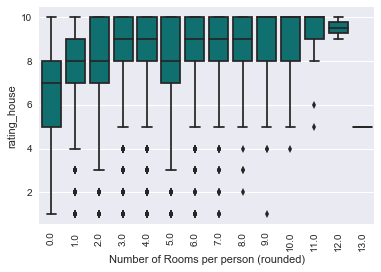

In [9]:
rooms_per_person = (df_household_clean['total_rooms']/df_household_clean['num_people']).round(decimals=0)
sns.boxplot(x=rooms_per_person, y='rating_house', data=df_household_clean, color='teal')
plt.xlabel('Number of Rooms per person (rounded)')
plt.xticks(rotation=90)
plt.show()

## Does the age of a home correlate to how highly the home is rated?

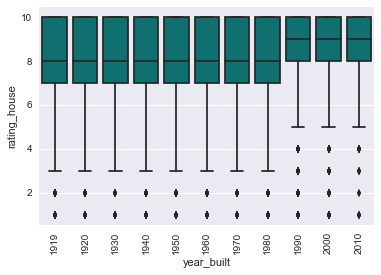

In [10]:
sns.boxplot(x='year_built', y='rating_house', data=df_household_clean, color='teal')
plt.xticks(rotation=90)
plt.show()

The ratings for homes built after 1990 tend to be higher, but before that, there don't seem to be any major differences in ratings for homes built between 1919 and the 1980s.

## What is the distribution of ratings for neighborhoods in the 2015 American Housing Survey? 


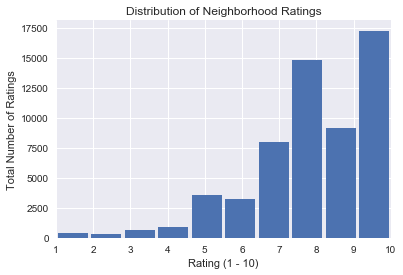

In [11]:
# plot a histogram to show the distribution of ratings

plt.hist(x='rating_neighborhood', bins=10, data=df_household_clean, rwidth=.9)
plt.xlim([1,10])
plt.title('Distribution of Neighborhood Ratings')
plt.xlabel('Rating (1 - 10)')
plt.ylabel('Total Number of Ratings')

sns.set()
plt.show()

The distribution of ratings for neighborhoods in the 2015 American Housing survey is very similar to the distribution of ratings for homes—10 is the most common rating, followed by 8.

## Do neighborhood ratings vary amongst different metropolitan regions?

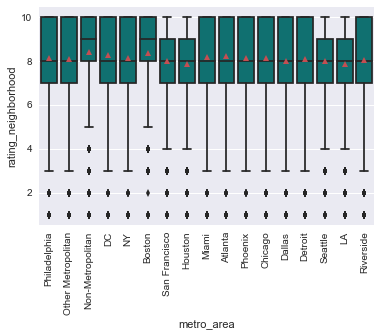

In [12]:
sns.boxplot(x='metro_area', y='rating_neighborhood', data=df_household_clean, color='teal', showmeans=True)
plt.xticks(rotation=90)
plt.figure(figsize=(20,20), dpi=200)
plt.show()

Neighboorhood ratings are generally similar amongst the different metropolitan regions, but Boston and Non-Metropolitan neighborhoods had the highest median and average ratings.

## Does the perception of petty crime affect how people rate their neighborhoods?

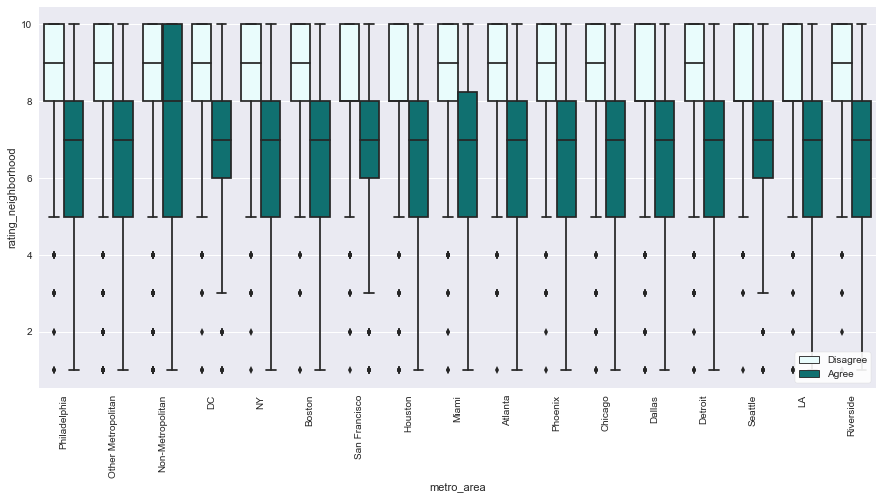

In [24]:
plt.figure(figsize=(15,7))

sns.boxplot(x='metro_area', y='rating_neighborhood', data=df_household_clean, color='teal', hue='petty_crime')
plt.xticks(rotation=90)
plt.legend(loc='lower right', frameon=True, facecolor='white', framealpha=0.9)
plt.show()